# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [4]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, SGD
import kagglehub


In [5]:
test_dir="C://Users/Lenovo/Documents/dataset/Images/Test"
train_dir="C://Users/Lenovo/Documents/dataset/Images/Train/"

In [6]:
label_map = {'audi': 0, 'lamborghini': 1, 'mercedes': 2}
class_names = ['audi','lamborghini','mercedes']

In [7]:
def load_images_from_directory(directory, label_map):
    images = []
    labels = []
    for label_name, label in label_map.items():
        folder_path = os.path.join(directory, label_name)
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            image = load_img(img_path, target_size=(28, 28))  # Resize as needed
            image = img_to_array(image) / 255.0  # Normalize pixel values between 0 and 1
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

In [8]:
train_images, train_labels = load_images_from_directory(train_dir, label_map)
test_images, test_labels = load_images_from_directory(test_dir, label_map)


In [9]:
train_images.shape

(64, 28, 28, 3)

In [10]:
len(train_labels)

64

In [11]:
train_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
test_images.shape

(58, 28, 28, 3)

In [13]:
len(test_labels)

58

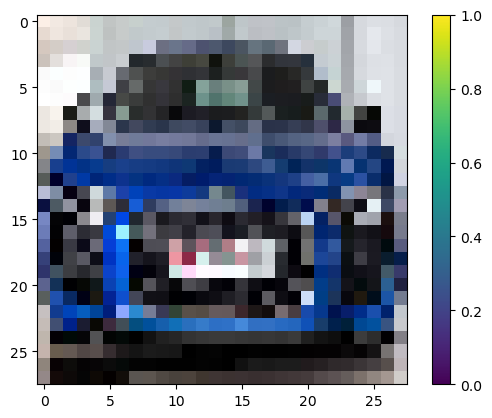

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

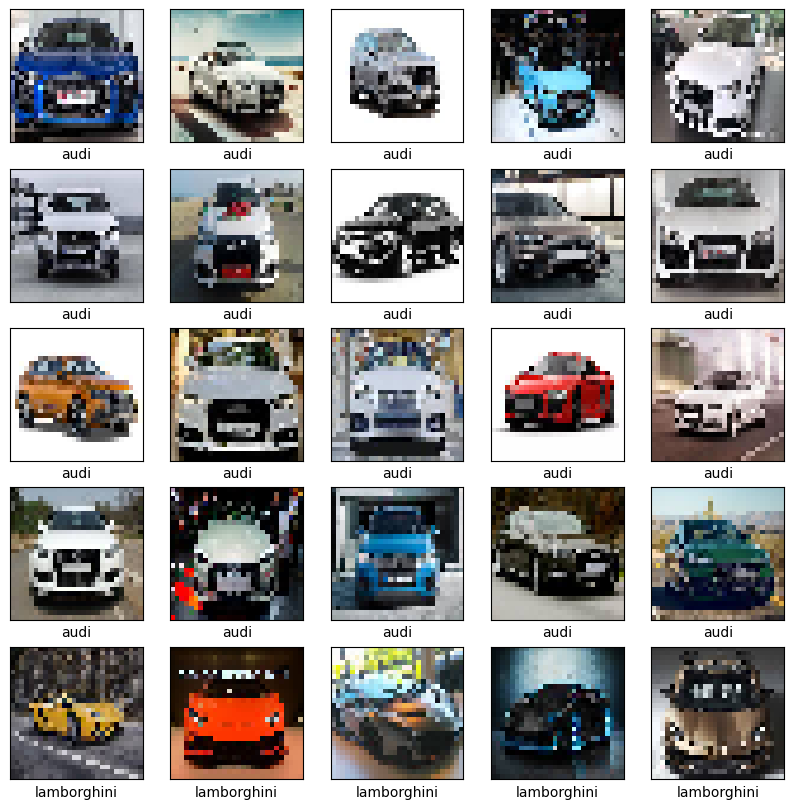

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
model = Sequential([
Input(shape=(28,28,3)),
Flatten(),
Dense(128, activation='relu'),
Dropout(0.4),
Dense(64, activation='relu'),
Dropout(0.4),
Dense(16, activation='softmax'),
])


In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=38, validation_data=(test_images, test_labels))


Epoch 1/38
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 633ms/step - accuracy: 0.0833 - loss: 2.8706 - val_accuracy: 0.2069 - val_loss: 1.9767
Epoch 2/38
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step - accuracy: 0.2604 - loss: 2.4938 - val_accuracy: 0.2241 - val_loss: 1.6181
Epoch 3/38
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.2708 - loss: 2.3093 - val_accuracy: 0.5172 - val_loss: 1.3956
Epoch 4/38
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.3125 - loss: 1.8244 - val_accuracy: 0.3621 - val_loss: 1.4136
Epoch 5/38
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.3646 - loss: 1.9549 - val_accuracy: 0.2931 - val_loss: 1.3775
Epoch 6/38
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.2812 - loss: 2.2874 - val_accuracy: 0.3966 - val_loss: 1.3746
Epoch 7/38
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.4062 - loss: 1.7798 - val_accuracy: 0.3966 - val_loss: 1.3581
Epoch 8/38
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.5104 - loss: 1.5631 - val_accuracy: 0.3621 - val_loss:

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6106 - loss: 1.1266
Test accuracy: 0.6034482717514038
